1. Import the required Python libraries and dataset

In [1]:
!pip install tensorflow 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU

2025-04-14 09:31:14.720598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744623075.055422      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744623075.146434      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2. Load & Normalize Dataset

In [4]:
# Load dataset
df = pd.read_csv("/kaggle/input/airline-passenger/airline.csv")
data = df['Thousands of Passengers'].values.reshape(-1, 1)

# Normalize between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

 3. Prepare sequences for RNN input

In [5]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

# Reshape for RNNs
X = X.reshape((X.shape[0], X.shape[1], 1))

4. Train-Test Split

In [6]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

5. Build RNN / LSTM / GRU Models

In [9]:
#Vanilla RNN
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

#LSTM
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

#GRU
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

 6. Compile the Models

In [10]:
for model in [model_rnn, model_lstm, model_gru]:
    model.compile(optimizer='adam', loss='mse')

 7. Train the Models

In [11]:
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0)
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0)
history_gru = model_gru.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0)

I0000 00:00:1744623287.725141     112 service.cc:148] XLA service 0x1d540570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744623287.725891     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744623287.725911     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744623287.964083     112 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744623288.744428     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8. Predict/Test the Models

In [12]:
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

# Inverse scale to original range
y_test_scaled = scaler.inverse_transform(y_test)
y_pred_rnn_scaled = scaler.inverse_transform(y_pred_rnn)
y_pred_lstm_scaled = scaler.inverse_transform(y_pred_lstm)
y_pred_gru_scaled = scaler.inverse_transform(y_pred_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


9. Visualize Performance: Accuracy & Loss

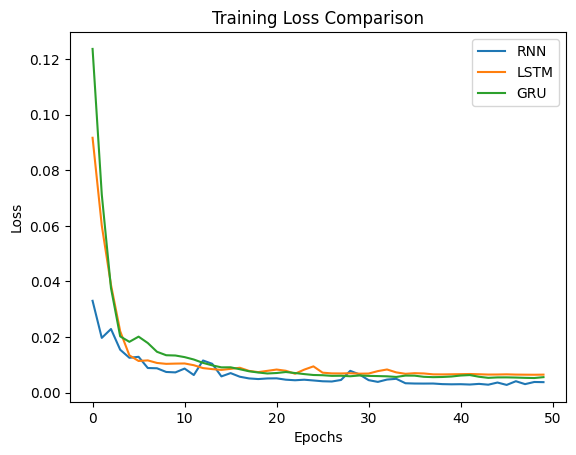

In [13]:
#Loss vs Epoch
plt.plot(history_rnn.history['loss'], label='RNN')
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_gru.history['loss'], label='GRU')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

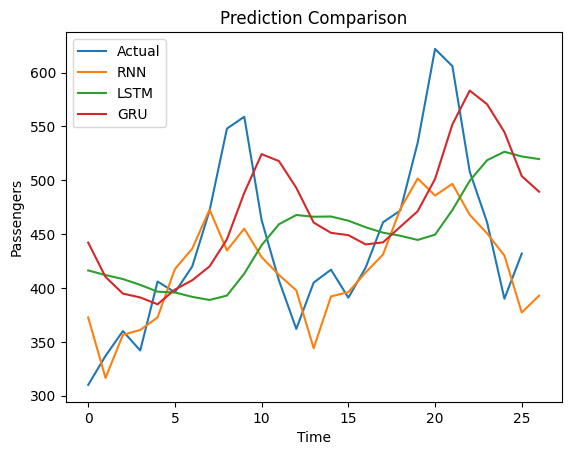

In [14]:
#Actual vs Predicted 
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_rnn_scaled, label='RNN')
plt.plot(y_pred_lstm_scaled, label='LSTM')
plt.plot(y_pred_gru_scaled, label='GRU')
plt.title("Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()